<a href="https://colab.research.google.com/github/RuwanPradeep0/Machine-Learning-Module-EC9630/blob/main/Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# For warnings
import warnings
warnings.filterwarnings('ignore')


# **Load the Dataset**

In [24]:
data = pd.read_csv("/content/Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# **Explore the Dataset**

In [25]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [26]:
# Basic information
data.info()


# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

# **Data Preparation**

In [32]:

# Data cleaning
data = data.dropna()

# Data normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 2:])

# Convert scaled data back to DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[2:])

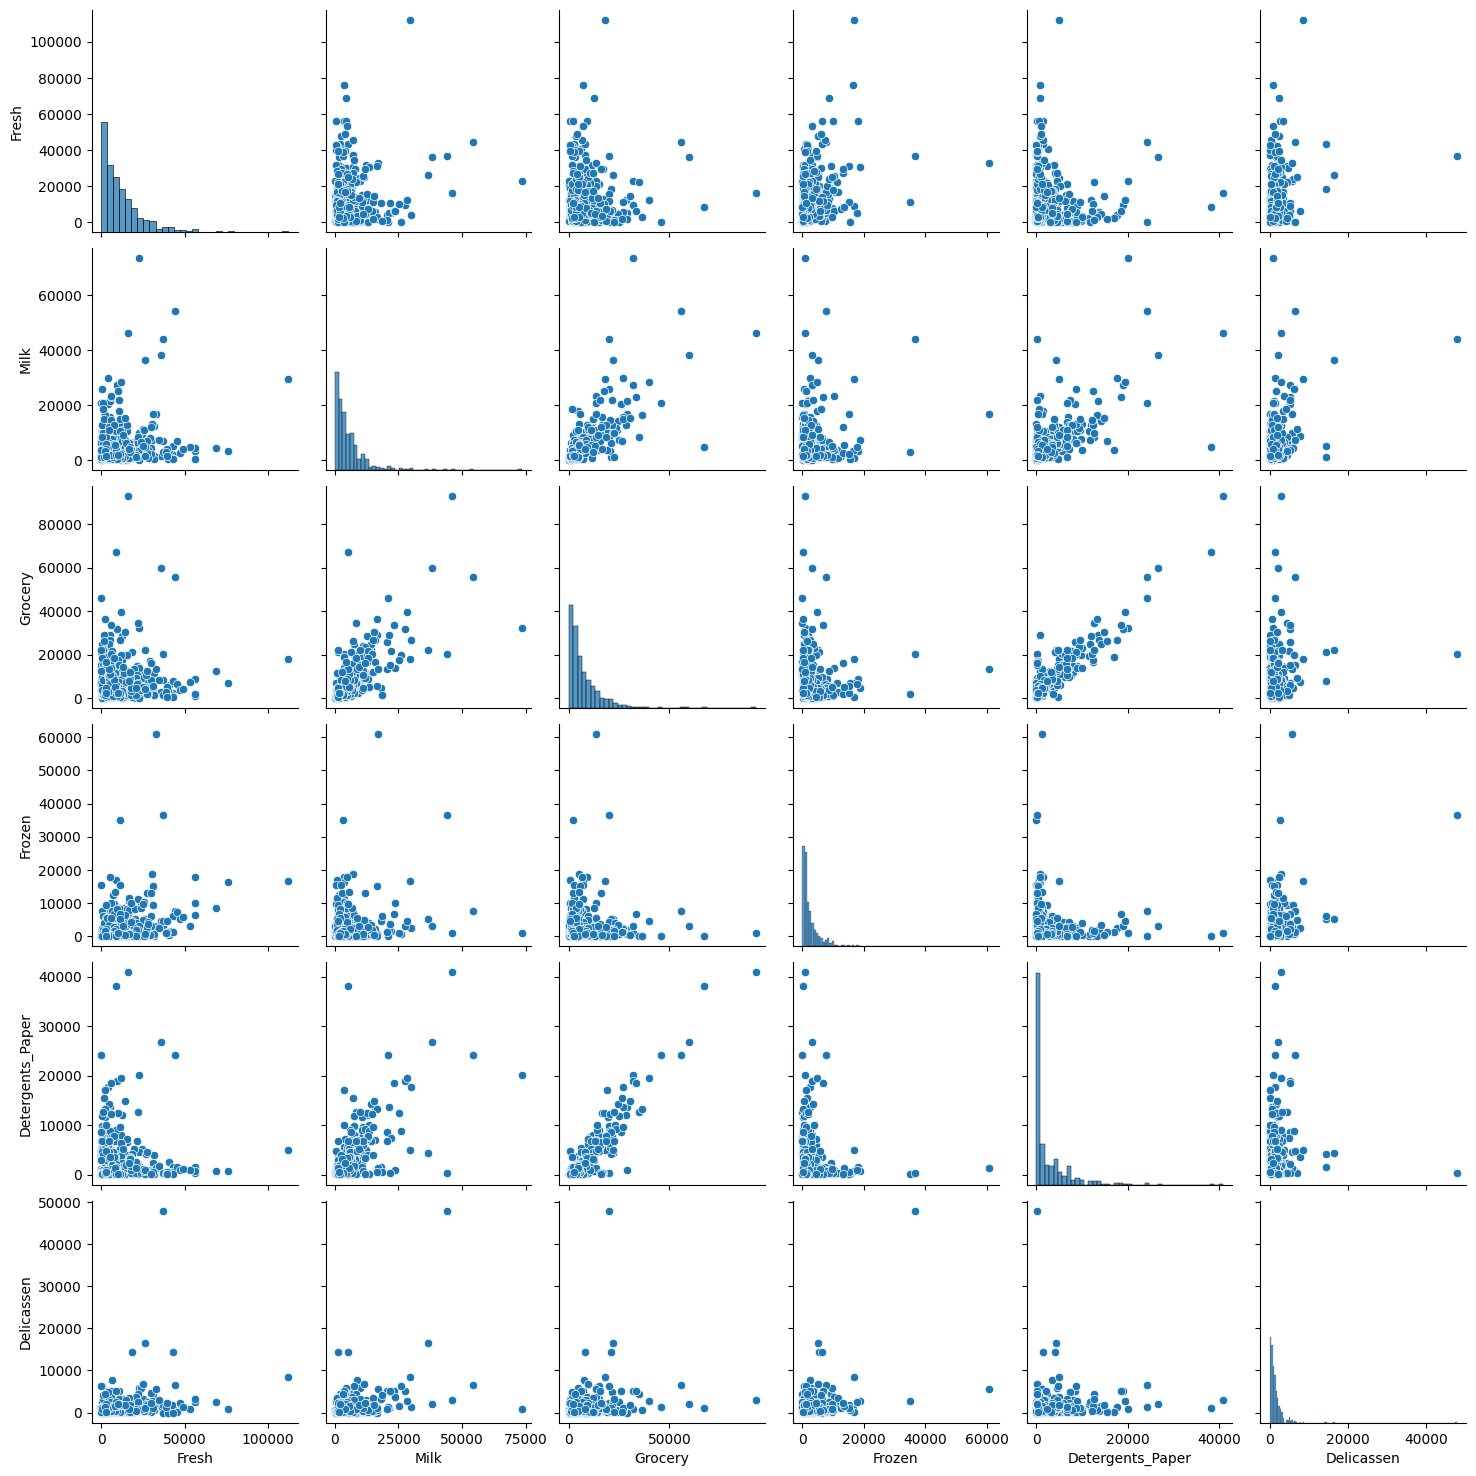

In [33]:
# Descriptive statistics
data.head(10)

# Pairplot
sns.pairplot(data.iloc[:, 2:])
plt.show()


**K-Means Clustering**

In [34]:
# Optimal number of clusters (e.g., 3 from the elbow method and silhouette score)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
labels_kmeans = kmeans.labels_

# Add labels to the original data
data['Cluster_KMeans'] = labels_kmeans


**DBSCAN Clustering**

In [35]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(data_scaled)

# Add labels to the original data
data['Cluster_DBSCAN'] = labels_dbscan


**Hierarchical Clustering**

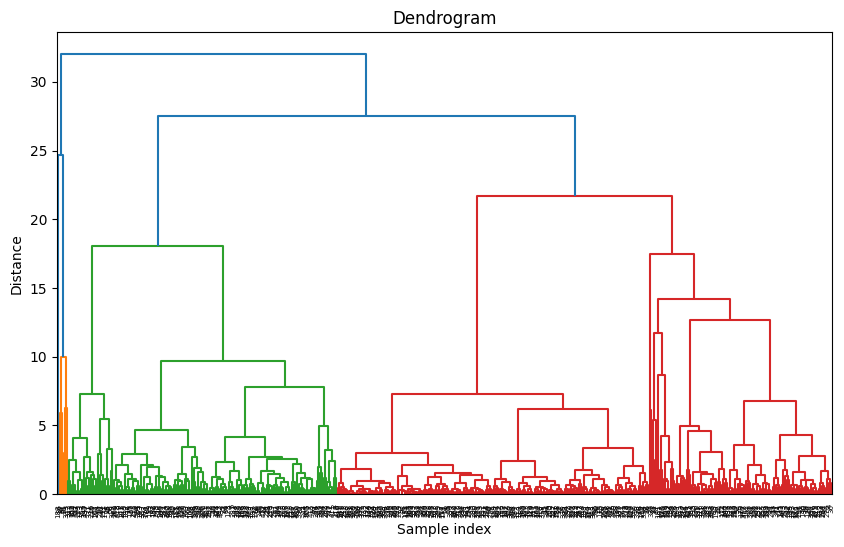

In [47]:
# Generate the linkage matrix
Z = linkage(data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Cut the dendrogram at a chosen threshold (e.g., 3 clusters)
labels_hierarchical = fcluster(Z, t=3, criterion='maxclust')

# Add labels to the original data
data['Cluster_Hierarchical'] = labels_hierarchical


# **Evaluate and Visualize Clustering Results**

In [37]:
# Silhouette scores
silhouette_kmeans = silhouette_score(data_scaled, labels_kmeans)
silhouette_dbscan = silhouette_score(data_scaled, labels_dbscan) if len(set(labels_dbscan)) > 1 else -1
silhouette_hierarchical = silhouette_score(data_scaled, labels_hierarchical)

# Davies-Bouldin indices
db_index_kmeans = davies_bouldin_score(data_scaled, labels_kmeans)
db_index_dbscan = davies_bouldin_score(data_scaled, labels_dbscan) if len(set(labels_dbscan)) > 1 else -1
db_index_hierarchical = davies_bouldin_score(data_scaled, labels_hierarchical)

# Print evaluation metrics
print(f'Silhouette Score (K-Means): {silhouette_kmeans}')
print(f'Silhouette Score (DBSCAN): {silhouette_dbscan}')
print(f'Silhouette Score (Hierarchical): {silhouette_hierarchical}')

print(f'Davies-Bouldin Index (K-Means): {db_index_kmeans}')
print(f'Davies-Bouldin Index (DBSCAN): {db_index_dbscan}')
print(f'Davies-Bouldin Index (Hierarchical): {db_index_hierarchical}')


Silhouette Score (K-Means): 0.53836620585661
Silhouette Score (DBSCAN): 0.1958113956262888
Silhouette Score (Hierarchical): 0.2646091480214908
Davies-Bouldin Index (K-Means): 1.0052226774674127
Davies-Bouldin Index (DBSCAN): 1.5793623209570946
Davies-Bouldin Index (Hierarchical): 1.284521357837458


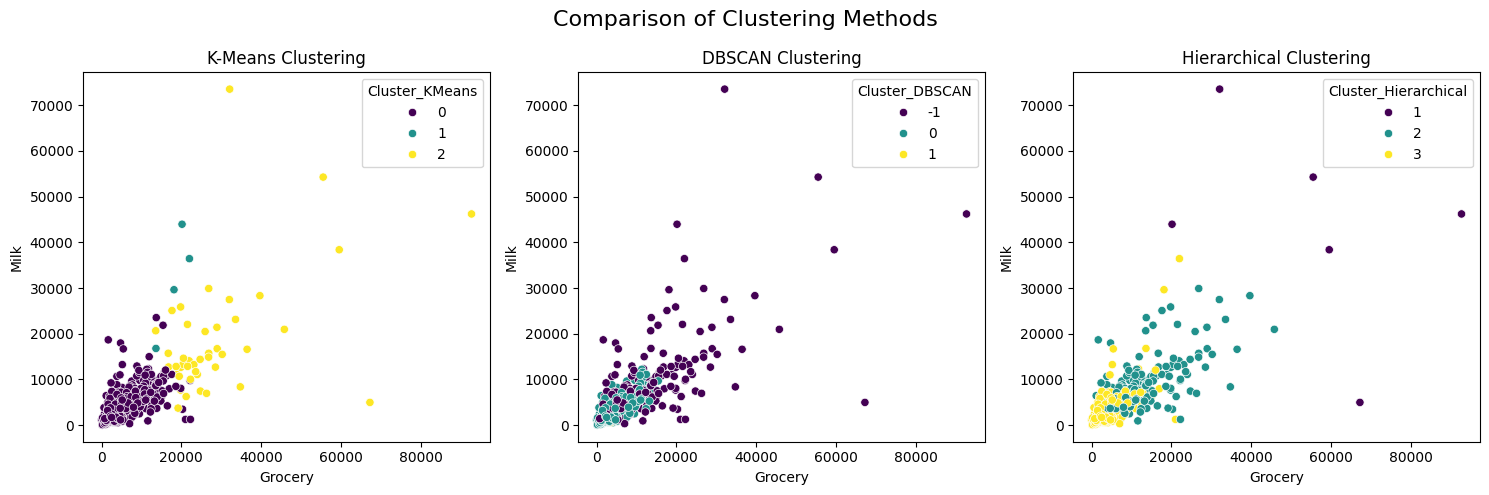

In [45]:
# Set up the plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Comparison of Clustering Methods', fontsize=16)

# K-Means Clustering
sns.scatterplot(x='Grocery', y='Milk', hue='Cluster_KMeans', data=data, palette='viridis', ax=ax1)
ax1.set_title('K-Means Clustering')

# DBSCAN Clustering
sns.scatterplot(x='Grocery', y='Milk', hue='Cluster_DBSCAN', data=data, palette='viridis', ax=ax2)
ax2.set_title('DBSCAN Clustering')

# Hierarchical Clustering
sns.scatterplot(x='Grocery', y='Milk', hue='Cluster_Hierarchical', data=data, palette='viridis', ax=ax3)
ax3.set_title('Hierarchical Clustering')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [39]:
# Select the best algorithm based on silhouette score and Davies-Bouldin index
if silhouette_kmeans > silhouette_dbscan and silhouette_kmeans > silhouette_hierarchical:
    best_algorithm = "K-Means"
elif silhouette_dbscan > silhouette_kmeans and silhouette_dbscan > silhouette_hierarchical:
    best_algorithm = "DBSCAN"
else:
    best_algorithm = "Hierarchical Clustering"

print(f'The best algorithm based on evaluation metrics is: {best_algorithm}')


The best algorithm based on evaluation metrics is: K-Means
